1.  Import the spam dataset and print the first six rows.  

In [ ]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import sklearn as skl
import os as os

In [ ]:
print(os.getcwd())

/content


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
spam_df = pd.read_csv ("/content/gdrive/MyDrive/spam_dataset.csv")

Mounted at /content/gdrive


In [ ]:
spam_df.dtypes

word_freq_make:                float64
word_freq_address:             float64
word_freq_all:                 float64
word_freq_3d:                  float64
word_freq_our:                 float64
word_freq_over:                float64
word_freq_remove:              float64
word_freq_internet:            float64
word_freq_order:               float64
word_freq_mail:                float64
word_freq_receive:             float64
word_freq_will:                float64
word_freq_people:              float64
word_freq_report:              float64
word_freq_addresses:           float64
word_freq_free:                float64
word_freq_business:            float64
word_freq_email:               float64
word_freq_you:                 float64
word_freq_credit:              float64
word_freq_your:                float64
word_freq_font:                float64
word_freq_000:                 float64
word_freq_money:               float64
word_freq_hp:                  float64
word_freq_hpl:           

Most of the values are float.  

2.  Read through the documentation of the original dataset here:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

There are two for which I am sure are crucial in affecting "spam":

word_freq_free: The word "free" is commonly associated with promotional emails with dubious authencity. Spam emails often advertise something for "free" to lure users into clicking or making a purchase.

char_freq_$: The dollar sign $ is frequently used in emails that are trying to sell something or those which might involve money scams. Many spam emails pertain to monetary transactions, get-rich-quick schemes, or fraudulent financial opportunities.

Any of the variables such as capital_run_length_average, longest or capital_run_length_total can be relevant to analyze the dependent variable. However, the later two are in int64 format. We prefer using float values for Machine Learning, so that leaves:  

capital_run_length_average: Spammers often use capital letters to grab attention. If an email contains long sequences of interrupted capital letters, then there would be a large amount of capital letters in the mail. This might be indicative of aggressive marketing tactics, which are common in spam.

3.  Visualize the univariate distribution of each of the variables in the previous question.  



In [ ]:
print(spam_df.head())


   word_freq_make:  word_freq_address:  word_freq_all:  word_freq_3d:  \
0             0.00                0.64            0.64            0.0   
1             0.21                0.28            0.50            0.0   
2             0.06                0.00            0.71            0.0   
3             0.00                0.00            0.00            0.0   
4             0.00                0.00            0.00            0.0   

   word_freq_our:  word_freq_over:  word_freq_remove:  word_freq_internet:  \
0            0.32             0.00               0.00                 0.00   
1            0.14             0.28               0.21                 0.07   
2            1.23             0.19               0.19                 0.12   
3            0.63             0.00               0.31                 0.63   
4            0.63             0.00               0.31                 0.63   

   word_freq_order:  word_freq_mail:  ...  char_freq_;:  char_freq_(:  \
0              0.00

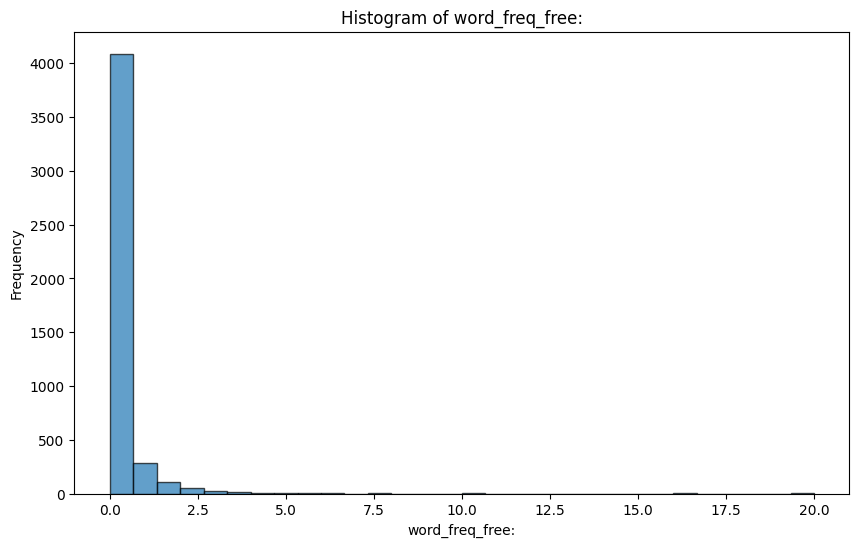

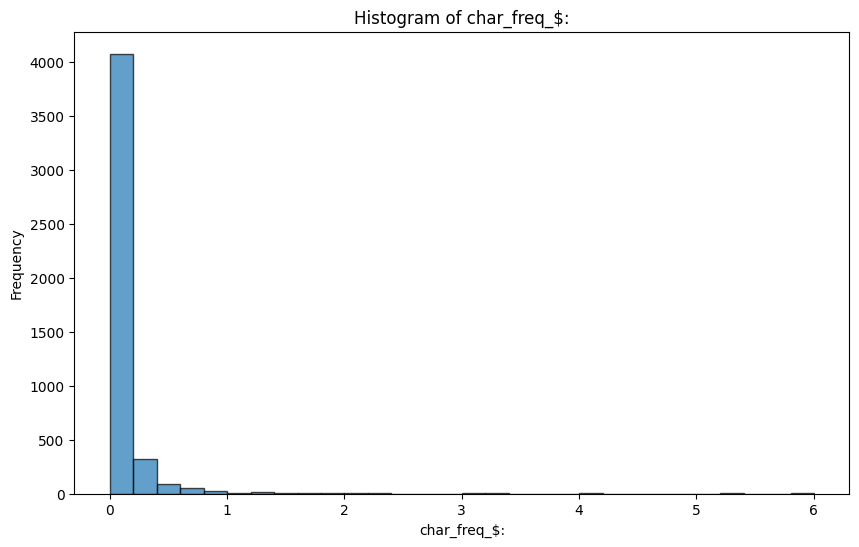

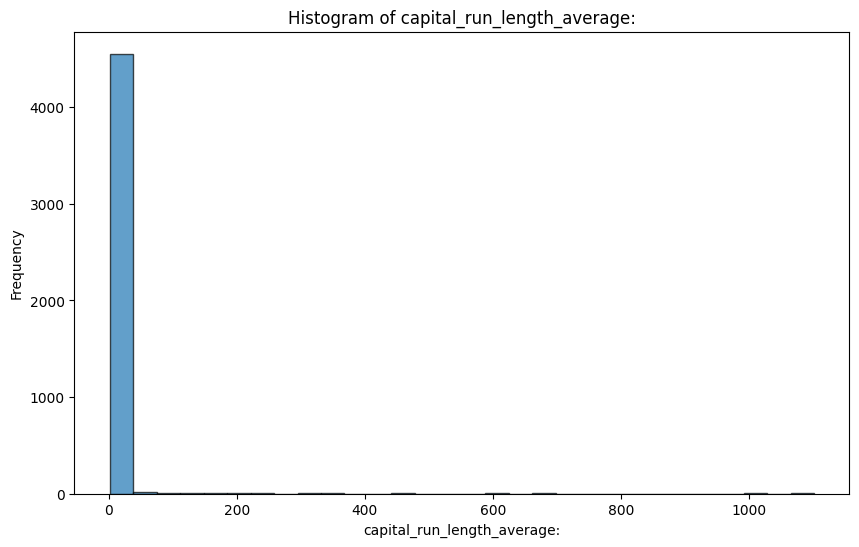

In [ ]:
import matplotlib.pyplot as plt

variables = ['word_freq_free:', 'char_freq_$:', 'capital_run_length_average:']

for var in variables:
    plt.figure(figsize=(10, 6))
    plt.hist(spam_df[var], bins=30, edgecolor='black', alpha=0.7)  # 30 bins is a common choice, but you can adjust as needed
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   


Logistic Regression: Logistic regression is often used for binary classification problems. It predicts the probability that a given value belongs to a particular category within a set of categories (in the case of binary, only two). Includes Lasso and Ridge

Decision Trees: They split the data into subsets based on the value of input features. This results in a tree-like model of decisions.

Random Forest: An ensemble method that creates a 'forest' of decision trees. Each tree is trained on a random subset of the data and makes its own predictions. The random forest algorithm then aggregates these predictions to produce a final result.

Support Vector Machines (SVM): SVMs are used for both regression and classification problems. In classification, they work by finding the hyperplane that best divides a dataset into classes.


K-Nearest Neighbors (KNN): For classification, KNN assigns a data point to the class most common among its 'k' closest data points in the training set.

5. Describe the importance of training and test data.  Why do we separate data into these subsets?



The training data is used to "teach" the model. Based on this data, the algorithm adjusts its weights, parameters, or rules to map inputs to the correct outputs.  If this data is of good quality and is representative, the model will likely perform well on unseen data through its hyperparameters.

The test data is used to evaluate the model's performance. After the model has been trained, it is exposed to this unseen data to determine how well it generalizes to new, previously unobserved inputs. A model with a dataset of good quality will correcly integrate new information to its structure, and more accurately interpreting the coeffecients so increasing its predicting capacity in real-life scenarios.

Among the most important reason to dissociate the data into two sets is to avoid overfit: New information is processed through the training data, before integrating it in the test data as to better capture new events without the risk of generalization. Evaluating the model on test data permits to obtain unbiased estimate of its performance, as this data has not been seen during the training phase. The model becomes more realistic. Dividing the sets permit to compare the perfomances of diverse supervised learning model until finding the most accurate one, with lower risk of overfit.

6. What is k-fold cross validation and what do we use it for?







K-fold cross validation is a technique used to assess the performance of a machine learning model more robustly by measuring the similarity between k observations of the dataset. The main idea is to divide the training dataset into 'k' subset equally (or almost equally) sized neighboors. This process is repeated according to k parameter.

K-fold is unique for taking the average of k different train/test split results than splitting the data in two sets. Every data point gets to be in a validation set exactly once and in a training set
k-1 times. This ensures that all observations are used for both training and validation, making efficient use of available data. With different variations of k-subset accordingly to the training data and taking its average, the k-fold measures gives an accurate depiction of data while reducing its overfit tendency. Finally, the model incorporates hyperparameters which is perfect for analyzing dataset with hidden noises.  

7. How is k-fold cross validation different from stratified k-fold cross validation?



K-fold cross validation randomly separates the dataset into k folds equal in size subsets, whereas stratified k-fold ensure that each fold of the dataset maintains the same proportion of observation/distribution of the target class as in the original dataset.

In other words, stratified is an improved version of k-fold by guaranteeing each fold is representative of the overall distribution. The model eventually has a lower variance, and should have a higher predictive score than the regular k-fold model.

K-fold is suited for regression as the data is already equalized. K stratifed fold is better in classification than k fold, as it guarantee that each class is adequately represented by each fold; espeicially useful when there is imbalanced distributions accross classes in the dataset.

8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  



Before getting deeper, both classifier and regression methods are relevant. Classification categorize as either spam (1) or not spam (0). Regreesion is better used in the realm of bayesian statistics. Classification is the most straight-forward so linear models are excluded. The main problem in this model is the unequal distribution accross the variables, so we want to test whatever this impact the performance of A.I to recognize spams. We should be aware of the presence of overfit when analyzing this dataset.

Also, all the models will repeat cross validation 10 times such as cv=10. This is done for convernient reasons, and efficient results. Also, the test data will always represent 30% of teh overall data as the data consists of thousands of observationsn according to class distribution:

Spam 1813 (39.4%)
Non-Spam 2788 (60.6%)

A test size of 30% provides a decent amount of data for testing. This means that performance metrics computed on the test set are likely to be stable (less variance in results), as compared to using a tiny test set.

All the models will evaluate prediction error through the Matrix, classification reports and accuracy test score. The higher the score test is, the lower the accuracy error is.

I'll start using a  logistic regression model with L1 regularization, with scaled data. I want to predict the probability of the mail being either a spam or not a spam. I use sacling methods to better capture the variables in a [0;1]interval. Lasso regularization is applied to shrink all the lesser important coefficients to 0. This leaves a better accuracy score as the model consider the ones affecting the most the target variable. I am choosing a c=100 coefficient to decrease the shrinkage of the lesser important scaled coefficients given the data might have classification problem in part to its skew-right univariate distribution. Neverthless, there could be a risk of overfitting by doing so.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

#Split the data

X = spam_df[['word_freq_free:', 'char_freq_$:', 'capital_run_length_average:']]
y = spam_df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

logreg = LogisticRegression(penalty='l1', solver='liblinear')
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid = GridSearchCV(logreg, param_grid=param_grid, cv=20)
grid.fit(X_train, y_train)

predicted_vals = logreg.predict(X_test_scaled)


print("logreg.predict: {}".format(predicted_vals))
print("logreg.coef_: {}".format(logreg.coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))


logreg.predict: [1 0 0 ... 0 0 0]
logreg.coef_: [[1.12263118 3.24063434 5.09826411]]
Training set score: 0.826


In [ ]:
predicted_vals = logreg.predict(X_test_scaled)

print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted_vals))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predicted_vals))

#Accuracy test eror is of 18%

Test set score: 0.822

Confusion Matrix:
[[657  34]
 [171 289]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.87       691
           1       0.89      0.63      0.74       460

    accuracy                           0.82      1151
   macro avg       0.84      0.79      0.80      1151
weighted avg       0.83      0.82      0.81      1151



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

scores = cross_val_score(logreg, X_train_scaled, y_train, cv=10)
print(f"Cross-validation mean score: {scores.mean():.3f}")

#Accuracy kfold eror is of 17.2%


Cross-validation mean score: 0.828


9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?



KNN is a non-parametric method, which means it doesn't make any assumptions about the underlying data distribution. It uses the training data itself to make predictions. In situations where patterns may emerge based on specific instances or where data points can be naturally clustered, KNN can perform well.

Stratified is used to equalize the imbalances accross the distribution of the independent variables.  

A smaller k can be more susceptible to noise in the dataset. As k increases, the decision boundary becomes smoother and less sensitive to individual data points. However, a very large can oversmooth and may not capture the intricacies of the data distribution. A value of 10 might be a middle-ground that captures patterns without being overly sensitive to noise.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Split the data

X = spam_df[['word_freq_free:', 'char_freq_$:', 'capital_run_length_average:']]
y = spam_df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=10) # The parameters using GridSearch to produce results with more accuracy
knn.fit(X_train_scaled, y_train)

print("K-fold Training set score: {:.3f}".format(knn.score(X_train_scaled, y_train)))


K-fold Training set score: 0.867


In [ ]:
y_pred = knn.predict(X_test_scaled)
print("K-fold on Test Data:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Accuracy eror test is of 16.5%

K-fold on Test Data: 0.835626357711803

Confusion Matrix:
 [[735  69]
 [158 419]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87       804
           1       0.86      0.73      0.79       577

    accuracy                           0.84      1381
   macro avg       0.84      0.82      0.83      1381
weighted avg       0.84      0.84      0.83      1381



In [ ]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("StratifiedKFold:\n{}".format(
cross_val_score(knn, X_train_scaled, y_train, cv=skfold).mean()))
print(f"Cross-validation mean score: {scores.mean():.3f}")

#Accuracy kfold eror is of 17.2%

StratifiedKFold:
0.848447204968944
Cross-validation mean score: 0.828


The Stratified Knn model has a higher test score than the log model. Plus, the log model has a higher chance of overfit given a higher value gap between the test and training set. KNN remains a better option for its better accuracy scores, especially on the test, and less chance of overfit, despite having the same cv prediction error score of 17.2%. Given the similar value between the training and test score, it is safe to assume k=10 parameter is efficient.  

10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?



Decision trees are inherently interpretable models. They allow for clear visualization of the decision-making process, making them useful in scenarios where understanding the model's decisions is crucial. Their use in binary format is extremely useful thanks to their methods. Decision trees are non-parametric, so they don't assume a particular distribution of the data.

A max depth of 5 can capture important patterns while remaining relatively simple. A tree that is allowed to grow too deep can become very specific to the training data, capturing noise and leading to overfitting.

The number 42 doesn't have any intrinsic properties that make it special for machine learning. However, it's a popular choice in the programming world due to cultural reasons (it's known as "the answer to the ultimate question of life, the universe, and everything" from Douglas Adams' "The Hitchhiker's Guide to the Galaxy"). It's simply a way to introduce a consistent seed for randomness.By setting the random state, you ensure that the results are reproducible. Each time you run the algorithm with that random state, you'll get the same results.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

#Split the data


X = spam_df[['word_freq_free:', 'char_freq_$:', 'capital_run_length_average:']]
y = spam_df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train_scaled, y_train)

y_pred_tree = dtree.predict(X_test_scaled)


print("Decision tree Training set score: {:.3f}".format(dtree.score(X_train_scaled, y_train)))


Decision tree Training set score: 0.871


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_tree = dtree.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix on test set:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report on test set:\n", classification_report(y_test, y_pred_tree))

#Accuracy error test is of 16.9%

Accuracy on test set: 0.8312816799420709

Confusion Matrix on test set:
 [[741  63]
 [170 407]]

Classification Report on test set:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       804
           1       0.87      0.71      0.78       577

    accuracy                           0.83      1381
   macro avg       0.84      0.81      0.82      1381
weighted avg       0.84      0.83      0.83      1381



In [ ]:
scores_tree = cross_val_score(dtree, X_train_scaled, y_train, cv=10)
print(f"Decision Tree Cross-validation mean score: {scores_tree.mean():.3f}")

#Accuracy kfold eror is of 14.3%


Decision Tree Cross-validation mean score: 0.857


The decision tree performs better than the Knn in its cv

Knn
  => 0.870 train score
     0.845 test score
     0.835 cv

Decision tree
      0.871 train
      0.831 test
      0.865 cv

Subjectively, the KNN might be a better model thanks to lower overfit but decision tree perfoms better on cross-validation, so it can better recognize a pattern with a 14.3% for decision, much better than 16.5% for knn. I would pick decision tree for this reason because its what trains the most efficiently the machine with new information, despite KNN having better predictive capacities. Plus, decision trees are easy to use and so to detect hidden paterns. Finally, decison trees might become more efficient as they train the data in a simple way thanks to its binary format.


11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Evaluate prediction error, did this model predict better than your previous models?



One of the main advantages of Random Forest over a single decision tree is its ability to reduce overfitting. A single decision tree, especially if it's deep, can often memorize the training data, leading to excellent training accuracy but poor generalization to new data. Random Forest builds multiple trees (each one on a subset of the data and a subset of the features) and averages the results, leading to a more generalized and robust model. Given that spam datasets might have a large number of features (words, characters, metadata, etc.), understanding which features are the most indicative of spam can be very valuable.

n=100 is the number of trees in the forest.  The more trees you add, the more robust and stable your model becomes (due to the law of large numbers). However, after a certain point, the benefits in accuracy start to diminish, and the computational cost continues to increase. For many datasets, around 100 trees bring the benefits of ensemble learning into effect without causing excessive computation. Still, 100 is a reasonable starting point or default value when specific tuning hasn't been performed.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Split the data
X = spam_df[['word_freq_free:', 'char_freq_$:', 'capital_run_length_average:']]
y = spam_df['spam']

# Correcting the variable names and using the right dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled,y_test)


print("Training set score: {:.3f}".format(clf.score(X_train_scaled, y_train)))


Training set score: 0.969


In [ ]:
y_pred = clf.predict(X_test_scaled)
print("Test Set Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix on test set:\n", metrics.confusion_matrix(y_test, y_pred))
print("\nClassification Report on test set:\n", metrics.classification_report(y_test, y_pred))

#Accuracy test eror is of 17.3%

Test Set Accuracy: 0.8279756733275413

Confusion Matrix on test set:
 [[606  85]
 [113 347]]

Classification Report on test set:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       691
           1       0.80      0.75      0.78       460

    accuracy                           0.83      1151
   macro avg       0.82      0.82      0.82      1151
weighted avg       0.83      0.83      0.83      1151



In [ ]:
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
print("Mean CV Accuracy:", cv_scores.mean())

#Accuracy kfold eror is of 16.5%


Mean CV Accuracy: 0.8356521739130436


The Random Forest has lower test set results than Strat KNN and decison tree with a test set accuracy 82.7%. It has also a much lower  cv score than decision tree. Also, Random Forest  comes with a potential high gap between the test and trainin set for random Forest, rendering it very sensitive to overfit. Part of the reason comes due its high complexity. For this reason, I chose Decision tree

12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?  



I chose decision tree because it has high cross validation score and the second best-score for test data, close to the values produced by Random Walk. It performs better then Stratified Knn while ensuring a much lower risk of overfit than Random Forest.

After reading the documentation on the midterm folder, I decided to change my choices based on objective numbers rather than subjectively as before.

word_freq_000: with an average of 0.80976 and coefficient of variation of 148%. Notion a number finishing by 000, like Win 10000$ which is spam


word_freq_your: with an average of 1.6621 and coefficient of variation of 107%. Your can link to a personal element attracting the person to clike

word_freq_make: with an average of 0.10455 and a coefficient of variation of 292%. Make relates a choice like make money easy, common in spams

Let's redo the Decision tree with these new variables





In [ ]:
X = spam_df[['word_freq_free:', 'char_freq_$:', 'word_freq_000:',
             'word_freq_your:', 'word_freq_make:', 'capital_run_length_average:']]
y = spam_df['spam']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train_scaled, y_train)

print("Decision tree Training set score: {:.3f}".format(dtree.score(X_train_scaled, y_train)))


Decision tree Training set score: 0.887


In [ ]:
y_pred_tree = dtree.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix on test set:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report on test set:\n", classification_report(y_test, y_pred_tree))

#Accuracy test error is of 14.8%

Accuracy on test set: 0.8522809558291093

Confusion Matrix on test set:
 [[729  75]
 [129 448]]

Classification Report on test set:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       804
           1       0.86      0.78      0.81       577

    accuracy                           0.85      1381
   macro avg       0.85      0.84      0.85      1381
weighted avg       0.85      0.85      0.85      1381



In [ ]:
scores_tree = cross_val_score(dtree, X_train_scaled, y_train, cv=10)
print(f"Decision Tree Cross-validation mean score: {scores_tree.mean():.3f}")

#Accuracy kfold eror is of 13.5%


Decision Tree Cross-validation mean score: 0.865


Yes it did, with a higher cv score by an increase of 0.008 points, higher test score of 0.852 and a reduced overfit with training at 0.887 so 0.005 points.

NOTE: After sufficiently training the machine, it seems adding new variables no longer increase the predictive capacities of decision tree and random forest.

13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  



Let's begin with logistic with Lasso attributes

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

#Split the data

X = spam_df[['word_freq_free:', 'char_freq_$:', 'word_freq_000:',
             'word_freq_your:', 'word_freq_make:', 'capital_run_length_average:']]
y = spam_df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(C=100, penalty='l1',solver='liblinear').fit(X_train_scaled, y_train)

predicted_vals = logreg.predict(X_test_scaled)
print("logreg.predict: {}".format(predicted_vals))

print("logreg.coef_: {}".format(logreg.coef_))
print("Training set score: {:.6f}".format(logreg.score(X_train_scaled, y_train)))


logreg.predict: [0 0 0 ... 0 1 0]
logreg.coef_: [[ 1.04679195  1.65089618  1.62648994  0.63007366 -0.05775008  4.25203462]]
Training set score: 0.833540


In [ ]:
print("Test set score: {:.6f}".format(logreg.score(X_test_scaled, y_test)))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted_vals))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predicted_vals))

#Accuracy test eror is of 17.5%


Test set score: 0.825489

Confusion Matrix:
[[760  44]
 [197 380]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       804
           1       0.90      0.66      0.76       577

    accuracy                           0.83      1381
   macro avg       0.85      0.80      0.81      1381
weighted avg       0.84      0.83      0.82      1381



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

scores = cross_val_score(logreg, X_train_scaled, y_train, cv=10)
print(f"Cross-validation mean score: {scores.mean():.6f}")

#Accuracy kfold eror is of 16.5%


Cross-validation mean score: 0.835093


Stratified Knn

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Split the data

X = spam_df[['word_freq_free:', 'char_freq_$:', 'word_freq_000:',
             'word_freq_your:', 'word_freq_make:', 'capital_run_length_average:']]
y = spam_df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=10) # The parameters using GridSearch to produce results with more accuracy
knn.fit(X_train_scaled, y_train)

print("K-fold Training set score: {:.3f}".format(knn.score(X_train_scaled, y_train)))


K-fold Training set score: 0.870


In [ ]:
y_pred = knn.predict(X_test_scaled)
print("K-fold on Test Data:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Accuracy test eror is of 15.5%

K-fold on Test Data: 0.8457639391745112

Confusion Matrix:
 [[752  52]
 [161 416]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       804
           1       0.89      0.72      0.80       577

    accuracy                           0.85      1381
   macro avg       0.86      0.83      0.84      1381
weighted avg       0.85      0.85      0.84      1381



In [ ]:
print("StratifiedKFold:\n{}".format(
cross_val_score(knn, X_train_scaled, y_train, cv=skfold).mean()))
print(f"Cross-validation mean score: {scores.mean():.3f}")

#Accuracy kfold eror is of 16.5%


StratifiedKFold:
0.8509316770186335
Cross-validation mean score: 0.835


Random Forest

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X = spam_df[['word_freq_free:', 'char_freq_$:', 'word_freq_000:',
             'word_freq_your:', 'word_freq_make:', 'capital_run_length_average:']]
y = spam_df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled,y_test)

y_pred = clf.predict(X_test_scaled)

print("Training set score: {:.3f}".format(clf.score(X_train_scaled, y_train)))


Training set score: 0.984


In [ ]:
y_pred = clf.predict(X_test_scaled)
print("Test Set Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix on test set:\n", metrics.confusion_matrix(y_test, y_pred))
print("\nClassification Report on test set:\n", metrics.classification_report(y_test, y_pred))

#Accuracy test eror is of 13.6%


Test Set Accuracy: 0.8645908761766835

Confusion Matrix on test set:
 [[731  73]
 [114 463]]

Classification Report on test set:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       804
           1       0.86      0.80      0.83       577

    accuracy                           0.86      1381
   macro avg       0.86      0.86      0.86      1381
weighted avg       0.86      0.86      0.86      1381



In [ ]:
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
print("Mean CV Accuracy:", cv_scores.mean())

#Accuracy kfold eror is of 13.3%


Mean CV Accuracy: 0.8677018633540372


I consider the decision tree to be the best model, despite the random forest having a higher cv score and accuracy on the test data. First, there is much more possibility of overfit given the large gab between the training score of .984 and the test score of 0.86 in random forest, while decision tree has 0.887 and 0.8523 respectively. Futhemore, decison trees are easier to interpret and analyze when the program is binary, whereas random walk is more efficient in a program multivariables. Finally, the decision tree has a cv score of 0.865, close to the random forest of 0.867 so the differences is too noticeable. The main advantage of the random forest comes for its low prediction error on the test data of 13.6% against 14.8 for the decision tree.  This makes decision tree safer to recognize hidden variations accross the variables, aiding the machine to accuratly predict which mail is a spam.

14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.



I would think on embedded links: If an email contains many links with a short url that changes its direction once clicked, it increases the likelihood of the email being spam.

Other variables can include Email Read Duration (if quantifable), Sender Reputation (requires large amount of data) or user feedback (same issue)

15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable.



The previous models we detailled were classification methods, particuliarly efficient to classify variables in different set of categories. This dataset, depite its unequal univariate distribution, has float values which are easier to use in a binary format. The context of this model was to build a machine distinguishing mails from spams. Hence, classifier methods were perfect to calculate the probability of reaching either 0 or 1 for the float values (easily convertible) and with logarithmic-related methods to keep probabilit wihtin a binary interval. In other words, classifier were the right models for analyzing a discrete set of random observations, which is the target value spam of either 0 or 1.

Continous variables can have an infinite number of numbers which can take any value within any particular range. Continous are especially interesting in regression analysis, or in predicting models with advanced methods of probability in their hyperparameters such as in Bayesian statistics.

In the case of Machine Learning, we uncovered many model for continous:

Linear Regression: This is the most fundamental regression model, which assumes a linear relationship between the independent variables and the dependent variable.

Ridge Regression (L2 regularization): A variant of linear regression that includes a regularization term. The regularization term discourages overly complex models which can lead to overfitting.

Lasso Regression (L1 regularization): Another variant of linear regression with a regularization term that can lead to some feature coefficients becoming exactly zero, effectively selecting a simpler model that doesn't include those features.

Decision Trees for Regression: Decision trees can be used for regression tasks by assigning a continuous value to each leaf, typically the mean of the target values for the instances that reach that leaf.

Random Forest for Regression: An ensemble method that combines the predictions of multiple decision trees.

K-Nearest Neighbors (KNN) for Regression: Instead of voting on a classification label, neighbors can average their values for regression predictions.

Support Vector Machines for Regression (SVR): SVMs can be adapted for regression tasks, often by using a different loss function (like the ε-insensitive loss).
